# Selection and Analysis of neutrino-Ar CCQE scattering with a single proton production 

In [1]:
import sys; sys.path.insert(0, '../../../AnaTreesPackage/notebooks'); sys.path.insert(0, '../');
from ccqe_notebook_tools import *
from tracking_tools import *
from notebooks_tools import * 
%matplotlib inline

In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/ClassificationOfCC1p/Figures/'
figures_size = (8,4)
figures_fontsize = 15
markers_size = 6

# data sample - MC-BNB and extBNB cocktail

In [3]:
File = ROOT.TFile("/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/TracksAnaFiles/Events_MCC8_MC_BNB_extBNB_AnalysisTrees.root")
eventsTree = File.Get("eventsTree")
data_sample = calcEventTopologies( eventsTree )
print int(eventsTree.GetEntries()),'events in MC-BNB/extBNB cocktail'

82000 events in MC-BNB/extBNB cocktail


## GENIE features of the data-sample 

In [707]:
def sample_in_FV(sample=None, max_FV_y = 110,
                 min_FV_z = 5, max_FV_z = 1045,
                 min_FV_x = 3, max_FV_x = 250):
    sample_in_FV = sample[ 
                              (np.abs(sample['starty_assigned_muon']) < max_FV_y)        
                            & (np.abs(sample['starty_assigned_proton']) < max_FV_y)
                            & (np.abs(sample['endy_assigned_muon']) < max_FV_y)        
                            & (np.abs(sample['endy_assigned_proton']) < max_FV_y)
                            
                            & ((sample['startz_assigned_muon'] > min_FV_z) & (sample['startz_assigned_muon'] < max_FV_z) )
                            & ((sample['startz_assigned_proton'] > min_FV_z) & (sample['startz_assigned_proton'] < max_FV_z) )                            
                            & ((sample['endz_assigned_muon'] > min_FV_z) & (sample['endz_assigned_muon'] < max_FV_z) )
                            & ((sample['endz_assigned_proton'] > min_FV_z) & (sample['endz_assigned_proton'] < max_FV_z) )

                            & ((sample['startx_assigned_muon'] > min_FV_x) & (sample['startx_assigned_muon'] < max_FV_x) )
                            & ((sample['startx_assigned_proton'] > min_FV_x) & (sample['startx_assigned_proton'] < max_FV_x) )                            
                            & ((sample['endx_assigned_muon'] > min_FV_x) & (sample['endx_assigned_muon'] < max_FV_x) )
                            & ((sample['endx_assigned_proton'] > min_FV_x) & (sample['endx_assigned_proton'] < max_FV_x) )
                           ]
    return sample_in_FV

In [1006]:
GENIECC1p = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_GENIECC1p_MCC8_MC_BNB_extBNB.csv')
print len(GENIECC1p),'GENIE true CC1p in the sample'
GENIECC1pIsVertexContained = GENIECC1p[GENIECC1p.IsVertexContained==True]
print len(GENIECC1pIsVertexContained),'contained CC1p'
GENIECC1pIsVertexReconstructed = GENIECC1pIsVertexContained[GENIECC1pIsVertexContained.IsVertexReconstructed==True]
print len(GENIECC1pIsVertexReconstructed),'reconstructed CC1p'
GENIECC1p_in_FV = sample_in_FV( GENIECC1pIsVertexReconstructed )
print len(GENIECC1p_in_FV),'reconstructed CC1p in FV'

12976 GENIE true CC1p in the sample
5299 contained CC1p
914 reconstructed CC1p
745 reconstructed CC1p in FV


### The CC1p pairs as a function of Ev

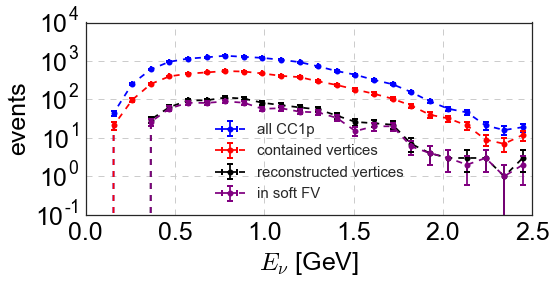

In [639]:
GENIEsamples = [GENIECC1p ,GENIECC1pIsVertexContained, GENIECC1pIsVertexReconstructed, GENIECC1p_in_FV]
GENIElabels = ['all CC1p', 'contained vertices' , 'reconstructed vertices' , 'in soft FV']
GENIEcolors = ['blue' , 'red' , 'black' , 'purple']
fig,ax = plt.subplots(figsize=figures_size)
bins = np.linspace(0,2.5,25)
for sample,label,color in zip(GENIEsamples,GENIElabels,GENIEcolors):
    h,bins,_=plt.hist(sample.truth_Ev,bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=markers_size, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='lower center',fontsize=figures_fontsize)
ax.grid(linestyle='--',alpha=1.)
set_axes(ax,x_label='$E_{\\nu}$ [GeV]',y_label='events')
plt.tight_layout()
ax.yaxis.set_major_locator(LinearLocator(5))
ax.set_yscale('log')
fig.savefig(figures_path + 'CC1pContributionInTheSampleEvBinned.pdf')

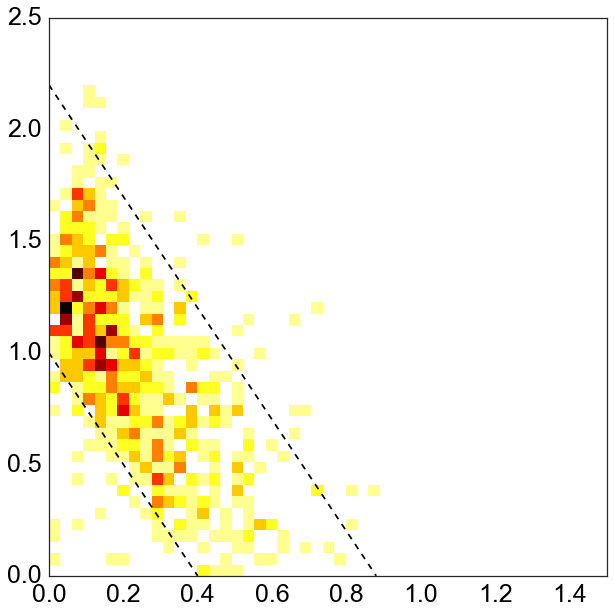

In [1007]:
sample = GENIECC1p_in_FV[(np.abs(GENIECC1p_in_FV.reco_CC1p_theta_pq-GENIECC1p_in_FV.truth_theta_pq)>0)]

# plot_2d_hist(GENIECC1p.truth_theta_pq,GENIECC1p.reco_CC1p_theta_pq,bins=np.linspace(0,50,50));
# plt.hist(sample.reco_CC1p_theta_pq-sample.truth_theta_pq,bins=np.linspace(-50,50,50),alpha=0.4);
# plt.hist(sample.reco_CC1p_theta_pq_mcsllhd-sample.truth_theta_pq,bins=np.linspace(-50,50,50),alpha=0.4);

# plt.hist(sample.reco_CC1p_Q2-sample.truth_Q2,bins=np.linspace(-1,1,50),alpha=0.4);
# plt.hist(sample.reco_CC1p_Q2_from_angles-sample.truth_Q2,bins=np.linspace(-1,1,50),alpha=0.4);

# MAYBE GOOD VARIABLE: RATIO OF RECO Q2 FROM MOMENTA TO RECO Q2 FROM ANGLES
# plt.hist(sample.reco_CC1p_Q2/sample.reco_CC1p_Q2_from_angles,bins=np.linspace(-1,1,50),alpha=0.4);

# MAYBE GOOD VARIABLE: S
# plt.hist(sample.reco_CC1p_s,bins=np.linspace(-1,10,50),alpha=0.4);

# MAYBE GOOD VARIABLE: 1 - 2.5 * reco_CC1p_W2 < reco_CC1p_Q2 < 2.2 - 2.5 * reco_CC1p_W2
# plot_2d_hist(sample.truth_Q2,sample.truth_W2,bins=np.linspace(0,1.5,50));
plot_2d_hist(sample.reco_CC1p_Q2,sample.reco_CC1p_W2,bins=(np.linspace(0,1.5,50),np.linspace(0,2.5,50)));
plt.plot([0,0.4],[1,0],'--',color='black')
plt.plot([0,0.88],[2.2,0],'--',color='black')


# plt.hist(sample.reco_CC1p_W2-sample.truth_W2,bins=np.linspace(-1,1,50),alpha=0.4);

# plot_2d_hist(sample.reco_CC1p_theta_pq-sample.truth_theta_pq,sample.reco_CC1p_Pmu-sample.truth_Pmu ,  # GENIECC1p.reco_CC1p_Pmu-
#              bins=(np.linspace(-10,50,50),np.linspace(-1.5,.1,50)));
# plot_2d_hist(sample.reco_CC1p_theta_pq-sample.truth_theta_pq,
#              sample.reco_CC1p_Pmu-sample.truth_Pmu,
#              bins=(np.linspace(-10,50,50),np.linspace(-1.5,0.15,50)));
# plot_2d_hist(np.abs(sample.reco_CC1p_theta_pq-sample.truth_theta_pq),
#              sample.mommsllhd_assigned_proton,#reco_CC1p_Pt,
#              bins=(np.linspace(0,50,50),np.linspace(-1.5,1.7,50)));

# plot_2d_hist(np.abs(sample.reco_CC1p_theta_pq-sample.truth_theta_pq),
#              sample.mommsllhd_assigned_proton,#reco_CC1p_Pt,
#              bins=(np.linspace(0,50,50),np.linspace(-1.5,1.7,50)));


# plot_2d_hist(sample.momrange_assigned_muon, sample.truth_Pmu,
#              bins=(np.linspace(0,2,50),np.linspace(0.,2,50)));
# plot_2d_hist(sample.mommsllhd_assigned_muon, sample.truth_Pmu,
#              bins=(np.linspace(0,2,50),np.linspace(0.,2,50)));

# muon_momentum_array=[sample.momrange_assigned_muon - sample.truth_Pmu
#           ,sample.mommsllhd_assigned_muon - sample.truth_Pmu
#           ,0.5*(sample.momrange_assigned_muon+sample.mommsllhd_assigned_muon) - sample.truth_Pmu]
# plt.hist(muon_momentum_array, bins=np.linspace(-2,2,50));
# for x in muon_momentum_array:
#     print 'avg:',np.mean(x),'std:',np.std(x)
    
# others = GENIECC1p[(GENIECC1p.IsVertexReconstructed==True)&(np.abs(GENIECC1p.reco_CC1p_theta_pq-GENIECC1p.truth_theta_pq)<10)]

# plot_2d_hist(others.reco_CC1p_theta_pq-others.truth_theta_pq,
#              others.reco_CC1p_Pmu-others.truth_Pmu,
#              bins=(np.linspace(-10,50,50),np.linspace(-1.5,0.15,50)));

# plt.hist(sample.momrange_assigned_muon/sample.mommsllhd_assigned_muon, bins=np.linspace(-1,2,100));
# plt.hist(sample.momrange_assigned_proton/sample.mommsllhd_assigned_proton, bins=np.linspace(-1,2,100));
# plt.hist(sample.mommsllhd_assigned_proton)

# print np.max(sample.momrange_assigned_muon/sample.mommsllhd_assigned_muon)
# var = 'reco_CC1p_p_over_q'
# plt.hist([sample[var],others[var]],bins=np.linspace(-.1,10,30));
# plot_2d_hist(GENIECC1p.truth_Pmu,GENIECC1p.reco_CC1p_Pmu,bins=(np.linspace(-0.1,1.4,50),np.linspace(-0.1,1.4,50)));

In [632]:
print len(sample),'reconstructed events with bad theta_pq'
# sample[['run','subrun','event','track_id','vertex_id','starty','endy','truth_theta_pq','reco_CC1p_theta_pq']]

914 reconstructed events with bad theta_pq


# 2-tracks clusters

In [904]:
# MCBNBextBNB = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_CC1pTopology_MCC8_MC_BNB_extBNB.csv')
# MCBNBextBNB_in_FV = sample_in_FV(MCBNBextBNB)
# print len(MCBNBextBNB),'2-tracks clusters from MC-BNB events + extBNB'
# print len(MCBNBextBNB_in_FV),'2-tracks clusters from MC-BNB events + extBNB in FV'

# MCBNBextBNB = MCBNBextBNB_in_FV
MCBNBextBNB['PIDa_ratio_smaller_larger'] = MCBNBextBNB['PIDA_small_pida']/MCBNBextBNB['PIDA_large_pida']
# MCBNBextBNB['length_ratio_short_long'] = MCBNBextBNB['l_short']/MCBNBextBNB['l_long']
MCBNBextBNB['reco_CC1p_alpha_q'] = (MCBNBextBNB['reco_CC1p_omega'] - MCBNBextBNB['reco_CC1p_q_z'])/0.931

# MCBNBextBNB = MCBNBextBNB_in_FV
print len(MCBNBextBNB),'2-tracks clusters from MC-BNB events + extBNB'

TrueCC1p = MCBNBextBNB[MCBNBextBNB.GENIECC1p==True]
print len(TrueCC1p), 'are true (GENIE) cc1p, ',float(100*float(len(TrueCC1p))/len(MCBNBextBNB)),'%'

CC1pDetected = MCBNBextBNB[(MCBNBextBNB.GENIECC1p==False) & (MCBNBextBNB.Is1mu1p==True)]
print len(CC1pDetected), 'are 2-tracks clusters of 1µ1p',float(100*float(len(CC1pDetected))/len(MCBNBextBNB)),'%'

NonCC1p = MCBNBextBNB[(MCBNBextBNB.GENIECC1p==False) & (MCBNBextBNB.Is1mu1p==False) & (MCBNBextBNB.pdg_long!=-9999) & (MCBNBextBNB.pdg_short!=-9999) ]
print len(NonCC1p), 'are 2-tracks not 1µ1p',float(100*float(len(NonCC1p))/len(MCBNBextBNB)),'%'

extPairs = MCBNBextBNB[(MCBNBextBNB.GENIECC1p==False) & (MCBNBextBNB.Is1mu1p==False) & ((MCBNBextBNB.pdg_long==-9999) | (MCBNBextBNB.pdg_short==-9999)) ]
print len(extPairs), 'are 2-tracks with unrecognized pdg code (extBNB)',float(100*float(len(extPairs))/len(MCBNBextBNB)),'%'

print len(TrueCC1p) + len(CC1pDetected) + len(NonCC1p) + len(extPairs)

samples = [TrueCC1p , CC1pDetected, NonCC1p , extPairs]
labels = ['true CC1p' , '1$\\mu$1p non CC1p' , 'non 1$\\mu$1p' , 'unrecognized' ]
cmaps = ['Blues' , 'Greens', 'Reds' , 'Purples']
colors = ['blue' , 'green', 'red' , 'purple']

25827 2-tracks clusters from MC-BNB events + extBNB
819 are true (GENIE) cc1p,  3.17110001162 %
2424 are 2-tracks clusters of 1µ1p 9.38552677431 %
3208 are 2-tracks not 1µ1p 12.4211096914 %
19376 are 2-tracks with unrecognized pdg code (extBNB) 75.0222635227 %
25827


# Enhance contribtion from true CC1p pairs while suppresing non-CC1p reconstructed pairs as well as cosmic background ?
We should look at all possible features of 2-tracks clusters and try to find 'money' cuts that kill background. Then, we can later on take care of maximizing efficiency and purity 

In [909]:
def plot_feature_2tracks_clusters(samples=samples,
                                  var='l_long',
                                  x_label='$l_{long}$ [cm]',mul=1,
                                  bins=np.linspace(0,300,100),fontsize=figures_fontsize,
                                  fig=None,do_add_legend=False,figsize=figures_size,
                                  Nh=2,Nw=2,i=None):
    if i is not None and fig is not None:
        ax = fig.add_subplot(Nh,Nw,i)
    else:
        fig,ax = plt.subplots(figsize=figsize)
    max_h=0
    for sample,label in zip(samples,labels):
        h,bins,_=plt.hist(mul*sample[var],normed=1,label=label,bins=bins,histtype='step',linewidth=3)
        if np.max(h)>max_h:
            max_h=np.max(h)
    if do_add_legend:
        ax.legend(fontsize=fontsize)
    set_axes(ax,x_label=x_label,fontsize=fontsize)
    ax.set_xlim(np.min(bins),np.max(bins))
    ax.set_ylim(0,1.05*max_h)
    ax.grid(linestyle='--',alpha=0.75)
    ax.xaxis.set_major_locator(LinearLocator(5));ax.yaxis.set_major_locator(LinearLocator(4))
    plt.tight_layout()
#     return fig


def plot_feature_2tracks_clusters_2d(samples=samples,plottype='hist',
                                  varx='l_long', vary='l_short',
                                  x_label='$l_{long}$ [cm]',y_label='$l_{short}$ [cm]',mulx=1,muly=1,
                                  bins=50,fontsize=figures_fontsize,
                                  fig=None,do_add_legend=False,figsize=figures_size):
    
    if plottype=='hist': fig = plt.figure(figsize=figsize)
    elif plottype=='scatter': fig,ax = plt.subplots(figsize=figsize)
        
    for i,sample,label,cmap,color in zip(range(len(samples)),samples,labels,cmaps,colors):
        if len(sample)<1: continue
        
        if plottype=='hist': 
            ax=fig.add_subplot(2,2,i+1)
            plot_2d_hist(mulx*sample[varx],muly*sample[vary],bins=bins,ax=ax,cmap=cmap)
            ax.set_title(label,y=1.02,fontsize=fontsize)
            set_axes(ax,x_label=x_label if i!=2 and i!=3 else '',y_label=y_label if i!=1 and i!=3 else '',fontsize=fontsize)
            ax.grid(linestyle='--',alpha=0.75)
            ax.xaxis.set_major_locator(LinearLocator(5));ax.yaxis.set_major_locator(LinearLocator(4))

            
        elif plottype=='scatter': 
            ax.scatter(mulx*sample[varx],muly*sample[vary],color=color)

    if plottype=='scatter':
        ax.set_title(label,y=1.02,fontsize=fontsize)        
        set_axes(ax,x_label=x_label,y_label=y_label,fontsize=fontsize)        
        ax.grid(linestyle='--',alpha=0.75)        
        ax.xaxis.set_major_locator(LinearLocator(5));ax.yaxis.set_major_locator(LinearLocator(4))
    plt.tight_layout()

In [905]:
def get_fraction_in_cut( data=None , cut_var='distance', mul=1 , xmin=0.1, xmax=10 , Nbins=10 ,  cut_type= 'max' ):
    x_array = np.linspace(xmin,xmax,Nbins)
    frac , frac_err = [] , []
    denominator = len(data)
    
    for x in x_array:
        if cut_type is 'max':
            reduced = data[mul*data[cut_var]<x]
        elif cut_type is 'min':
            reduced = data[mul*data[cut_var]>x]
        numerator = float(len(reduced))
         
        frac.append(100 * numerator / denominator)
        frac_err.append( frac[-1] * np.sqrt(1./numerator + 1./denominator) ) if numerator>0 else frac_err.append( frac[-1]/np.sqrt(denominator) )
        
    return np.array(x_array), np.array(frac) , np.array(frac_err)


def get_fraction_in_symmetriccut( data=None , cut_var='delta_phi', mul=1,xcenter=0.1, delta_x_min=0, delta_x_max=100 , Nbins=10 ):
    delta_x_array = np.linspace(delta_x_min,delta_x_max,Nbins)
    frac , frac_err = [] , []
    denominator = len(data)
    
    for delta_x in delta_x_array:
        reduced = data[np.abs(mul*data[cut_var]-xcenter)<delta_x]
        numerator = float(len(reduced))         
        frac.append(100 * numerator / denominator)
        frac_err.append( frac[-1] * np.sqrt(1./numerator + 1./denominator) ) if numerator>0 else frac_err.append( frac[-1]/np.sqrt(denominator) )
        
    return np.array(delta_x_array), np.array(frac) , np.array(frac_err)


def plot_cut_samples (cut_name='maximal distance between tracks',mul=1,
                      cut_var ='distance',
                      cut_type= 'max',
                      x_label = 'maximal tracks distance [cm]', y_label='% of the original sample',
                      xcenter=0,figsize=figures_size,
                      xmin=0.1, xmax=10 , Nbins=10, do_add_legend=True, ax=None):
    do_return_fig = False
    if ax is None:
        do_return_fig = True
        fig,ax=plt.subplots(figsize=figsize)    
    for sample,label in zip(samples,labels):
        if cut_type=='max' or cut_type=='min':
            x , frac , frac_eff = get_fraction_in_cut( data=sample , cut_var=cut_var , mul=mul , cut_type=cut_type , xmin=xmin, xmax=xmax , Nbins=Nbins )
        elif cut_type=='symmetric':
            x , frac , frac_eff = get_fraction_in_symmetriccut( data=sample , cut_var=cut_var , mul=mul , xcenter=xcenter, delta_x_min=xmin, delta_x_max=xmax , Nbins=Nbins )
        plt.errorbar(x , y=frac, yerr=frac_eff , fmt='o' , markersize=markers_size , label=label)
    if do_add_legend:
        ax.legend(fontsize=figures_fontsize,loc='best')
    ax.set_ylim(0,101)
    ax.set_xlim(xmin,xmax)
    set_axes(ax,x_label=x_label,y_label=y_label,fontsize=figures_fontsize)
    ax.grid(linestyle='--',alpha=0.75)
    plt.tight_layout()
    if do_return_fig: return fig

#### fiducial volume (y-position of the tracks)

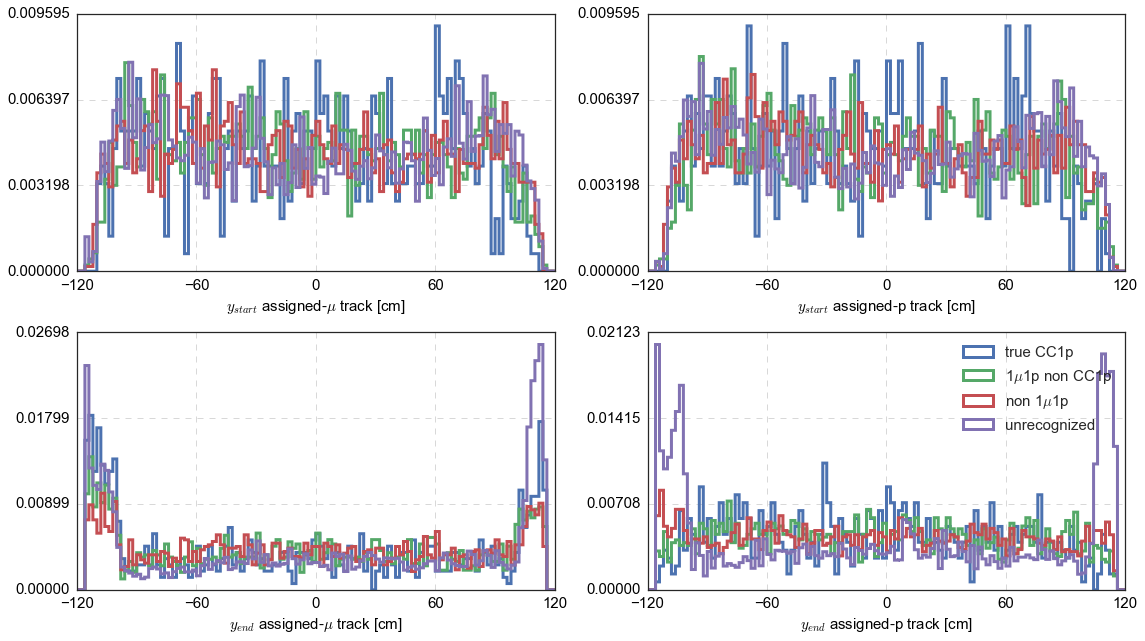

In [714]:
fig=plt.figure(figsize=(16,9))
plot_feature_2tracks_clusters(i=1,var='starty_assigned_muon',x_label='$y_{start}$ assigned-$\mu$ track [cm]',bins=np.linspace(-120,120,121),fig=fig)
plot_feature_2tracks_clusters(i=2,var='starty_assigned_proton',x_label='$y_{start}$ assigned-p track [cm]',bins=np.linspace(-120,120,121),fig=fig)
plot_feature_2tracks_clusters(i=3,var='endy_assigned_muon',x_label='$y_{end}$ assigned-$\mu$ track [cm]',bins=np.linspace(-120,120,121),fig=fig)
plot_feature_2tracks_clusters(i=4,var='endy_assigned_proton',x_label='$y_{end}$ assigned-p track [cm]',bins=np.linspace(-120,120,121),fig=fig,do_add_legend=True)
plt.tight_layout()
plt.tight_layout()
fig.savefig(figures_path + 'yPosotionOfTheTracks.pdf')

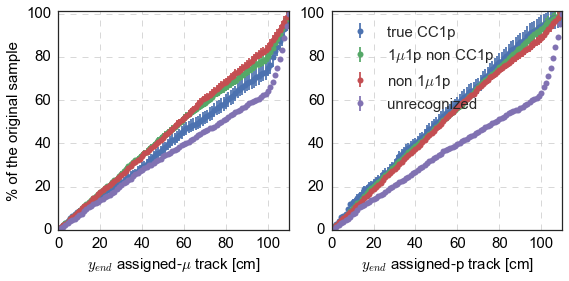

In [713]:
fig=plt.figure(figsize=figures_size)
ax = fig.add_subplot(1,2,1)
plot_cut_samples(cut_var ='endy_assigned_muon',do_add_legend=False,           
                 cut_type= 'symmetric',
                 x_label = '$y_{end}$ assigned-$\mu$ track [cm]',
                 xcenter=0, xmin=0., xmax=110 , Nbins=100 , ax=ax)
ax = fig.add_subplot(1,2,2)
plot_cut_samples(cut_var ='endy_assigned_proton',do_add_legend=True,
                 cut_type= 'symmetric',
                 x_label = '$y_{end}$ assigned-p track [cm]',y_label='',
                 xcenter=0, xmin=0., xmax=110 , Nbins=100, ax=ax)
plt.tight_layout()
fig.savefig(figures_path + 'yPosotionOfTheTracks_cuts.pdf')

### \theta_1,2

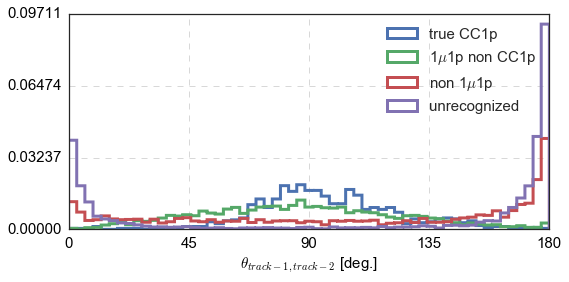

In [716]:
plot_feature_2tracks_clusters(var='2_tracks_angle',x_label='$\\theta_{track-1,track-2}$ [deg.]',mul=180./np.pi,bins=np.linspace(0,180,60),do_add_legend=True)
plt.savefig(figures_path + 'angle_between_tracks.pdf')

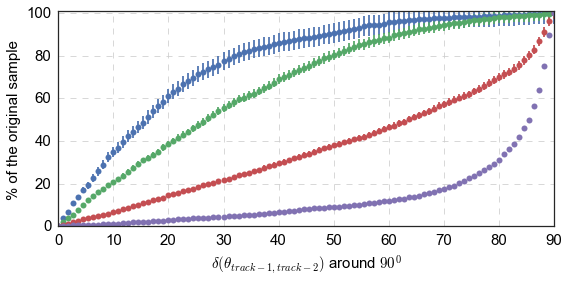

In [718]:
fig=plot_cut_samples(cut_var ='2_tracks_angle',mul=180./np.pi,do_add_legend=False,
                 cut_type= 'symmetric',
                 x_label = '$\\delta (\\theta_{track-1,track-2})$ around $90^0$',
                 xcenter=90,
                 xmin=0., xmax=90 , Nbins=100)
fig.savefig(figures_path + 'angle_between_tracks_cuts.pdf')

#### \delta_phi

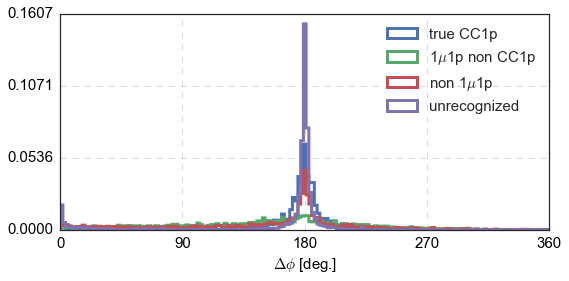

In [719]:
plot_feature_2tracks_clusters(var='delta_phi',x_label='$\\Delta \\phi$ [deg.]',do_add_legend=True,bins=np.linspace(0,360,180))
plt.savefig(figures_path + 'DeltaPhi.pdf')

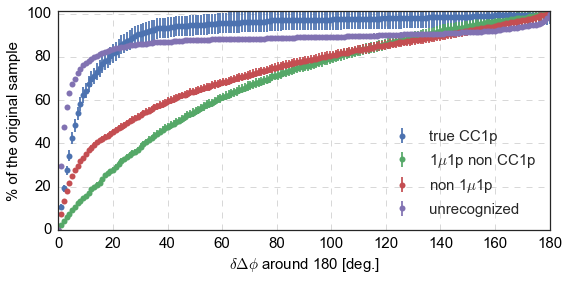

In [720]:
fig=plot_cut_samples(cut_var ='delta_phi',                
                 cut_type= 'symmetric',
                 x_label = '$\\delta \\Delta \\phi$ around 180 [deg.]',
                 xcenter=180,
                 xmin=0., xmax=180 , Nbins=180)
plt.savefig(figures_path + 'DeltaPhi_cuts.pdf')

#### \theta_pq

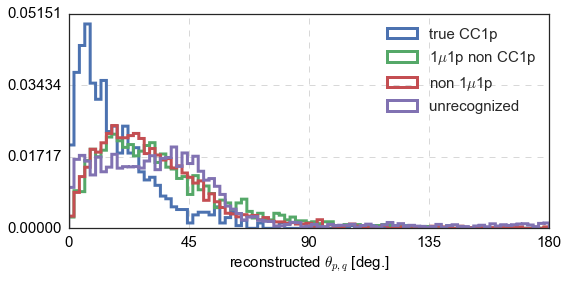

In [721]:
plot_feature_2tracks_clusters(var='reco_CC1p_theta_pq',x_label='reconstructed $\\theta_{p,q}$ [deg.]',bins=np.linspace(0,180,90),do_add_legend=True)
plt.savefig(figures_path + 'theta_pq.pdf')

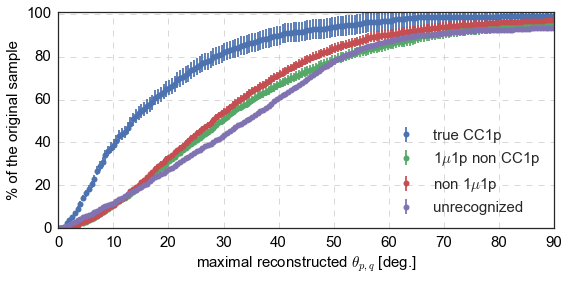

In [722]:
fig=plot_cut_samples(cut_var ='reco_CC1p_theta_pq', cut_type= 'max',                 
                 x_label = 'maximal reconstructed $\\theta_{p,q}$ [deg.]', 
                 xmin=0, xmax=90 , Nbins=180)
fig.savefig(figures_path + 'theta_pq_cuts.pdf')

#### p/q

mean of p/q for true CC1p: 1.40743648559


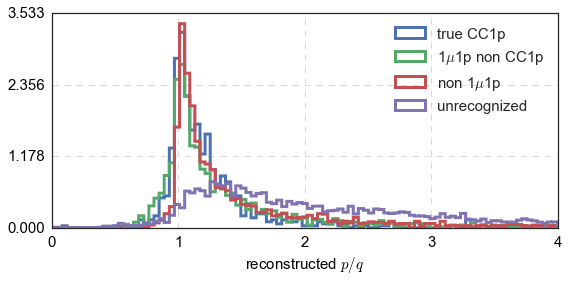

In [723]:
plot_feature_2tracks_clusters(var='reco_CC1p_p_over_q',x_label='reconstructed $p/q$',bins=np.linspace(0,4,100),do_add_legend=True)
plt.savefig(figures_path + 'p_over_q.pdf')
print 'mean of p/q for true CC1p:',np.mean(TrueCC1p.reco_CC1p_p_over_q)

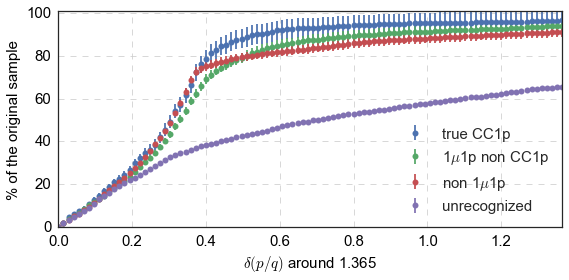

In [724]:
fig=plot_cut_samples(cut_var ='reco_CC1p_p_over_q', cut_type= 'symmetric',                 
                 x_label = '$\\delta (p/q)$ around 1.365',
                 xcenter=1.365,
                 xmin=0., xmax=1.365 , Nbins=100)
fig.savefig(figures_path + 'p_over_q_cuts.pdf')

### PIDa ratio

mean of PIDa smaller/larger for true CC1p: 0.47779388829


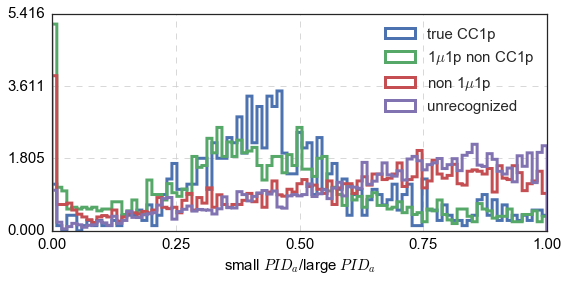

In [725]:
plot_feature_2tracks_clusters(var='PIDa_ratio_smaller_larger',x_label='small $PID_{a}$/large $PID_{a}$',bins=np.linspace(0,1,100),do_add_legend=True)
plt.savefig(figures_path + 'PIDa_ratio.pdf')
print 'mean of PIDa smaller/larger for true CC1p:',np.mean(TrueCC1p.PIDa_ratio_smaller_larger)

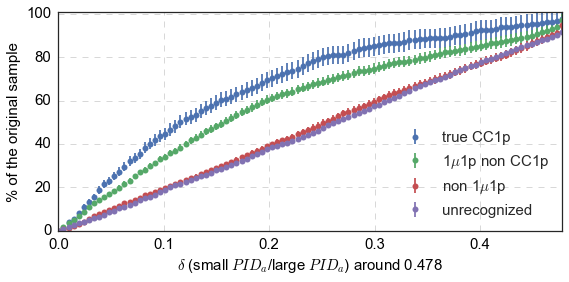

In [726]:
fig=plot_cut_samples(cut_var ='PIDa_ratio_smaller_larger', cut_type= 'symmetric',                 
                 x_label = '$\\delta$ (small $PID_{a}$/large $PID_{a}$) around %.3f'%np.mean(TrueCC1p.PIDa_ratio_smaller_larger),
                 xcenter = np.mean(TrueCC1p.PIDa_ratio_smaller_larger),
                 xmin=0., xmax=np.mean(TrueCC1p.PIDa_ratio_smaller_larger) , Nbins=100)
fig.savefig(figures_path + 'PIDa_ratio_cuts.pdf')

### length

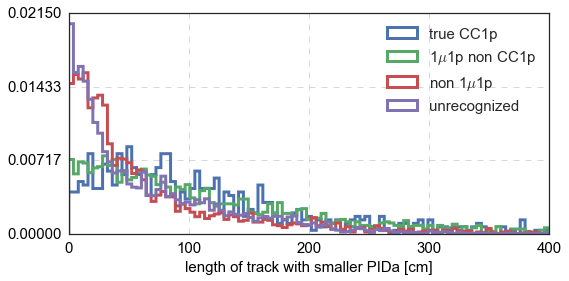

In [727]:
plot_feature_2tracks_clusters(var='l_small_pida',x_label='length of track with smaller PIDa [cm]',bins=np.linspace(0,400,100),do_add_legend=True)
plt.savefig(figures_path + 'l_small_pida.pdf')

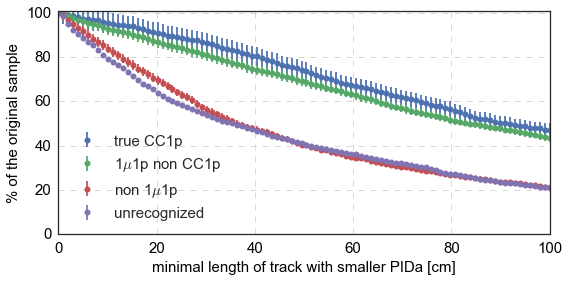

In [728]:
fig=plot_cut_samples(cut_var ='l_small_pida', cut_type= 'min',                 
                 x_label = 'minimal length of track with smaller PIDa [cm]', 
                 xmin=0, xmax=100 , Nbins=100)
fig.savefig(figures_path + 'l_small_pida_cuts.pdf')

### Pt

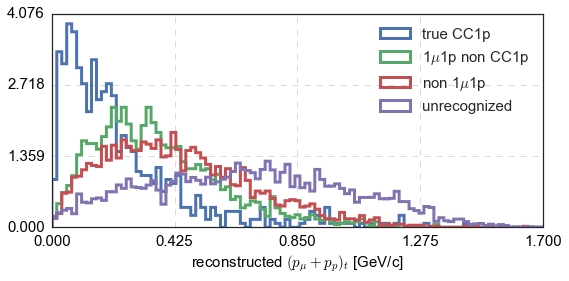

In [729]:
plot_feature_2tracks_clusters(var='reco_CC1p_Pt',x_label='reconstructed $(p_{\\mu}+p_{p})_t$ [GeV/c]',bins=np.linspace(0,1.7,100),do_add_legend=True)
plt.savefig(figures_path + 'Pt.pdf')

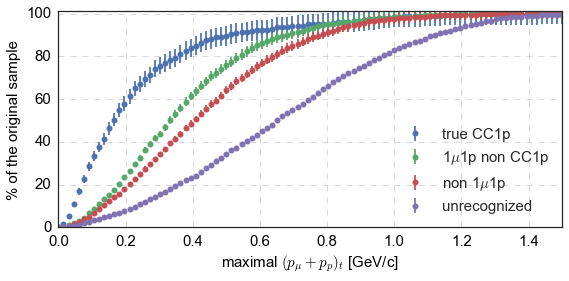

In [730]:
fig=plot_cut_samples(cut_var ='reco_CC1p_Pt',do_add_legend=True,
                 cut_type= 'max',                 
                 x_label = 'maximal $(p_{\\mu}+p_{p})_t$ [GeV/c]',                 
                 xmin=0., xmax=1.5 , Nbins=100)
fig.savefig(figures_path + 'Pt_cuts.pdf')

### Ev from angles

mean of Ev (angles) - Ev (mu p) diff: 0.732327685726


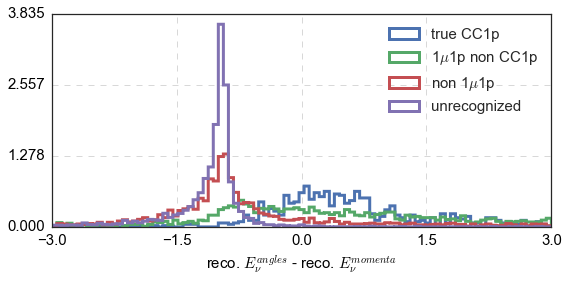

In [731]:
plot_feature_2tracks_clusters(var='reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff',x_label='reco. $E_{\\nu}^{angles}$ - reco. $E_{\\nu}^{momenta}$',bins=np.linspace(-3,3,100),do_add_legend=True)
plt.savefig(figures_path + 'Ev_from_angles_Ev_from_mu_p_diff.pdf')
print 'mean of Ev (angles) - Ev (mu p) diff:',np.mean(TrueCC1p.reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff)

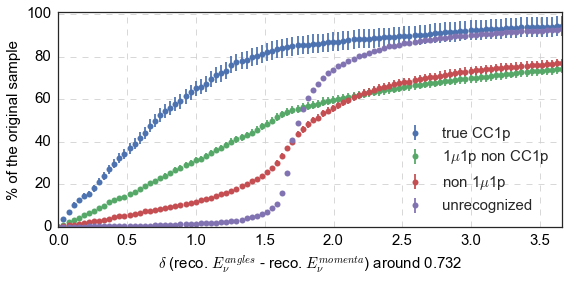

In [732]:
fig=plot_cut_samples(cut_var ='reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff',do_add_legend=True,
                 cut_type= 'symmetric',
                 x_label = '$\\delta$ (reco. $E_{\\nu}^{angles}$ - reco. $E_{\\nu}^{momenta}$) around %.3f'%np.mean(TrueCC1p.reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff),
                 xcenter=np.mean(TrueCC1p.reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff),
                 xmin=0., xmax=5*np.mean(TrueCC1p.reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff) , Nbins=100) 
fig.savefig(figures_path + 'Ev_from_angles_Ev_from_mu_p_diff_cuts.pdf')

### W2

mean of W2 for true CC1p: 0.884036383223


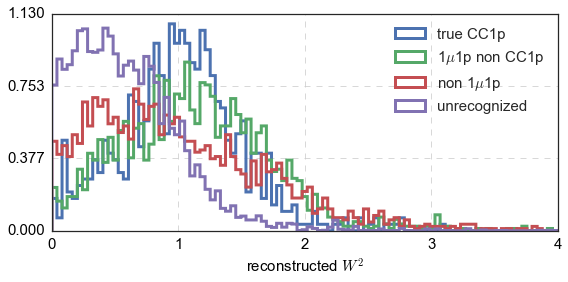

In [733]:
plot_feature_2tracks_clusters(var='reco_CC1p_W2',x_label='reconstructed $W^{2}$',bins=np.linspace(0,4,100),do_add_legend=True)
plt.savefig(figures_path + 'W2.pdf')
print 'mean of W2 for true CC1p:',np.mean(TrueCC1p.reco_CC1p_W2)

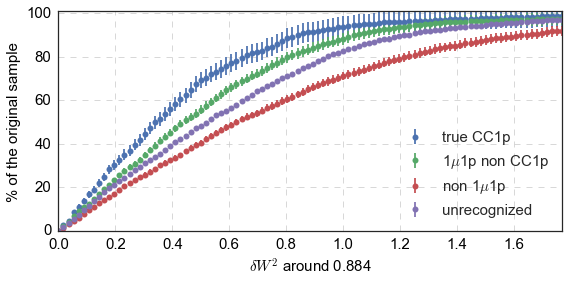

In [734]:
fig=plot_cut_samples(cut_var ='reco_CC1p_W2',do_add_legend=True,cut_type= 'symmetric',                 
                 x_label = '$\\delta W^{2}$ around %.3f'%np.mean(TrueCC1p.reco_CC1p_W2),
                 xcenter = np.mean(TrueCC1p.reco_CC1p_W2),
                 xmin=0., xmax=2*np.mean(TrueCC1p.reco_CC1p_W2) , Nbins=100)
fig.savefig(figures_path + 'W2_cuts.pdf')

### q vs. w

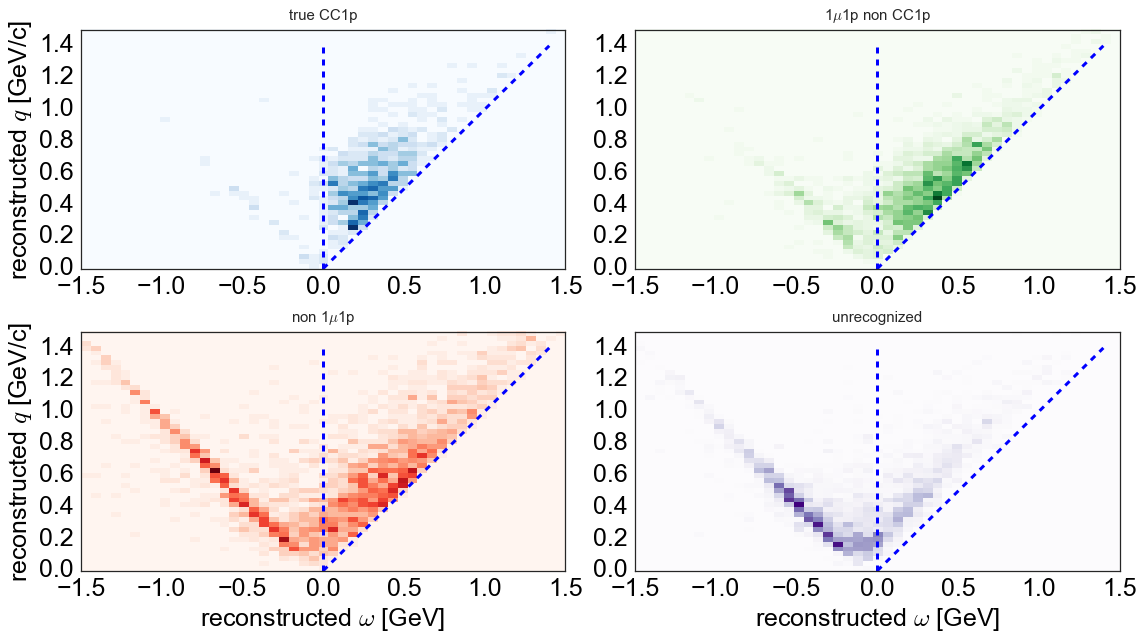

In [735]:
fig = plt.figure(figsize=(16,9))
bins=(np.linspace(-1.5,1.5,50),np.linspace(0,1.5,50))
varx='reco_CC1p_omega'
vary='reco_CC1p_q'

x_label='reconstructed $\omega$ [GeV]'
y_label='reconstructed $q$ [GeV/c]'

for i,sample,label,cmap in zip(range(len(samples)),samples,labels,cmaps):
    ax = fig.add_subplot(2,2,i+1)
    ax.set_title(label,fontsize=figures_fontsize,y=1.02)
    plot_2d_hist(sample[varx],sample[vary],ax=ax,fontsize=figures_fontsize,bins=bins,cmap=cmap)
    plt.plot([0,0],[0,1.4],'--',color='blue',linewidth=3)
    plt.plot([0,1.4],[0,1.4],'--',color='blue',linewidth=3)

    set_axes(ax,x_label=x_label if i>1 else '' , y_label=y_label if i!=1 and i!=3 else '')
plt.tight_layout()
fig.savefig(figures_path+'q_vs_omega.pdf')

### charge deposition around the vertex that is not associate with the tracks (my-tracking)

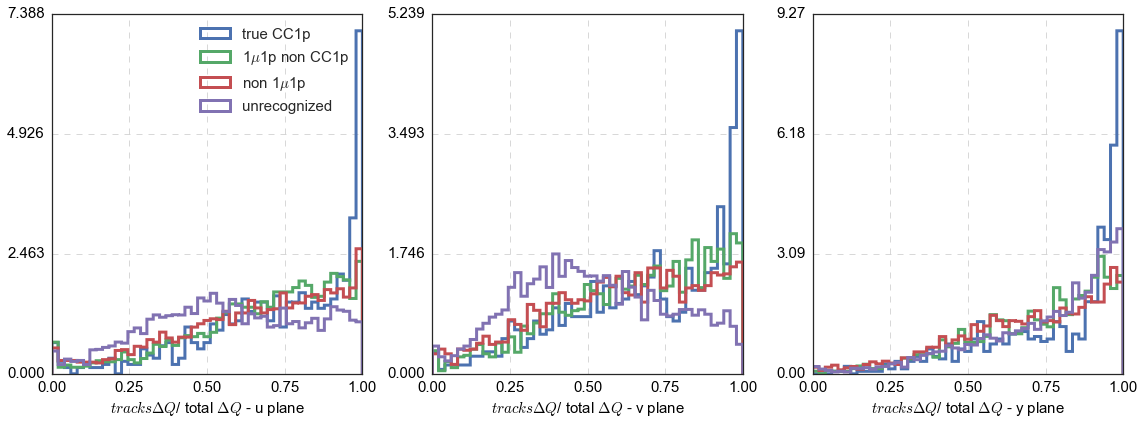

In [736]:
fig=plt.figure(figsize=(16,6))
bins = np.linspace(0,1.,50)
x_label='$tracks \\Delta Q$/ total $\\Delta Q$'
plot_feature_2tracks_clusters(Nh=1,Nw=3,i=1,var='ratio_associated_hit_charge_to_total_u',x_label=x_label+' - u plane',bins=bins,fig=fig,do_add_legend=True)
plot_feature_2tracks_clusters(Nh=1,Nw=3,i=2,var='ratio_associated_hit_charge_to_total_v',x_label=x_label+' - v plane',bins=bins,fig=fig)
plot_feature_2tracks_clusters(Nh=1,Nw=3,i=3,var='ratio_associated_hit_charge_to_total_y',x_label=x_label+' - y plane',bins=bins,fig=fig)
plt.tight_layout()
fig.savefig(figures_path + 'ratio_associated_hit_charge_to_total.pdf')

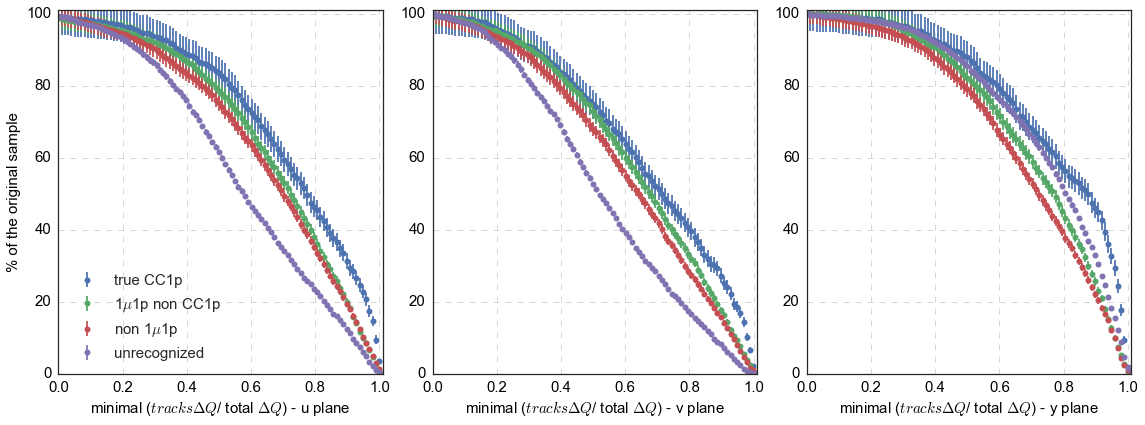

In [737]:
fig=plt.figure(figsize=(16,6))
x_label='minimal ($tracks \\Delta Q$/ total $\\Delta Q$)'
for i,plane in enumerate(['u','v','y']):
    ax = fig.add_subplot(1,3,i+1)
    plot_cut_samples(cut_var ='ratio_associated_hit_charge_to_total_'+plane,do_add_legend=True if i==0 else False,           
                     cut_type= 'min',
                     x_label = x_label + ' - ' + plane + ' plane',
                     y_label='% of the original sample' if i==0 else '',
                     xcenter=0, xmin=0., xmax=1.01 , Nbins=100 , ax=ax)
plt.tight_layout()
fig.savefig(figures_path + 'ratio_associated_hit_charge_to_total_cuts.pdf')

## Application of the cuts to the samples

### first find a sample of 100% purity

In [704]:
def sample_in_selected_cut( data=None, label='' ,do_print=False

                           ,max_distance=30 # [cm]
                           ,max_FV_y = 130 # [cm]
                           ,max_theta_pq = 360 # [deg.]
                           ,max_reco_CC1p_Pt = 100

                           ,delta_Delta_phi = 360 # around 180 [deg.]
                           ,delta_2_tracks_angle = 360 # around 90
                           ,delta_reco_CC1p_p_over_q = 100 # around 1.365 
                           ,delta_reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff = 100 # around 0.711
                           ,delta_PIDa_ratio_smaller_larger = 100 # around 0.467
                           ,delta_reco_CC1p_W2 = 10 # around 0.89

                           ,min_ratio_associated_hit_charge_to_total_u = -10
                           ,min_ratio_associated_hit_charge_to_total_v = -10
                           ,min_ratio_associated_hit_charge_to_total_y = -10 
#                            ,delta_cfdistance = 200 # closest flash distance [cm]
                          ):

    data_in_FV = sample_in_FV(sample=data,max_FV_y=max_FV_y)
    reduced = data_in_FV[     
        (data_in_FV['distance'] < max_distance)
        
        & (np.abs(data_in_FV['delta_phi'] - 180) < delta_Delta_phi)
        
        & (data_in_FV['reco_CC1p_omega'] > 0)
        & (data_in_FV['reco_CC1p_omega'] < data_in_FV['reco_CC1p_q'])

        & (np.abs(180./np.pi*data['2_tracks_angle'] - 90) < delta_2_tracks_angle )
        & (data_in_FV['reco_CC1p_theta_pq'] < max_theta_pq )                
        & (np.abs(data_in_FV['reco_CC1p_p_over_q'] - 1.365) < delta_reco_CC1p_p_over_q )
        & (np.abs(data_in_FV['PIDa_ratio_smaller_larger'] - 0.467) < delta_PIDa_ratio_smaller_larger )
        & (data_in_FV['reco_CC1p_Pt'] < max_reco_CC1p_Pt)
        & (np.abs(data_in_FV['reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff'] - 0.711) < delta_reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff )
        & (np.abs(data_in_FV['reco_CC1p_W2'] - 0.89) < delta_reco_CC1p_W2 )
                
        & (data_in_FV['ratio_associated_hit_charge_to_total_u'] > min_ratio_associated_hit_charge_to_total_u)
        & (data_in_FV['ratio_associated_hit_charge_to_total_v'] > min_ratio_associated_hit_charge_to_total_v)
        & (data_in_FV['ratio_associated_hit_charge_to_total_y'] > min_ratio_associated_hit_charge_to_total_y)

#     # match the closest flash
#         & (np.fabs(data['cfdistance_long']) < delta_cfdistance)
#         & (np.fabs(data['cfdistance_short']) < delta_cfdistance)
    ]    
    
    frac = 100 * float(len(reduced)) / len(data) 
    frac_err = frac * np.sqrt( 1./len(reduced) + 1./len(data) ) if len(reduced)>0 else frac / np.sqrt(len(data))
    if do_print: print label,"retained %.1f +/- %.1f"%(frac,frac_err)+ "% in this cut (",len(reduced),")"
    return reduced , frac , frac_err

In [910]:
# r,f,_=sample_in_selected_cut(samples[0]); print f
# 100% : [ 98.9  0.2  56.14   0.714   1.69  95.84  0.84  1.76 0.0 0.6 0.0 ] # W2
reduced,frac,frac_err = [], [] , []
for sample,label in zip(samples,labels):
    r,f,f_err = sample_in_selected_cut( data=sample, label=label, do_print=True
                                       ,max_distance=3 # [cm]
                                       ,max_FV_y = 98 # [cm]
                                       ,max_theta_pq = 5 # 40 # [deg.]
                                       ,max_reco_CC1p_Pt = 10.100                                    
                                       ,delta_Delta_phi = 25 # around 180 [deg.]
                                       ,delta_2_tracks_angle = 360 # around 90
                                       ,delta_reco_CC1p_p_over_q = 100 # around 1.365 
                                       ,delta_reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff = 1.1 # around 0.711
                                       ,delta_PIDa_ratio_smaller_larger = 0.3 # around 0.467
                                       ,delta_reco_CC1p_W2 = 10 # around 0.981
                                       ,min_ratio_associated_hit_charge_to_total_u = 0.5
                                       ,min_ratio_associated_hit_charge_to_total_v = 0.
                                       ,min_ratio_associated_hit_charge_to_total_y = 0.5 
                                      )
    reduced.append(r)
    frac.append(f)
    frac_err.append(f_err)

print 'efficiency: %.1f +/-%.1f'%(frac[0],frac_err[0]),'%'
purity = 100.*(float(len(reduced[0]))/(len(reduced[0])+len(reduced[1])+len(reduced[2])+len(reduced[3])))
print 'purity: %.1f'%purity,'%'

true CC1p retained 7.6 +/- 1.0% in this cut ( 62 )
1$\mu$1p non CC1p retained 0.2 +/- 0.1% in this cut ( 5 )
non 1$\mu$1p retained 0.0 +/- 0.0% in this cut ( 1 )
unrecognized retained 0.0 +/- 0.0% in this cut ( 0 )
efficiency: 7.6 +/-1.0 %
purity: 91.2 %


# WHAT ARE the Backgournd 
or: whats the best fucking way to kill them? 

41.0 % µ-µ
17.8 % µ-π
19.7 % p-p
11.3 % π-p
5.0 % π-π
1.0 % µ-e/photon
non categorized 4.2


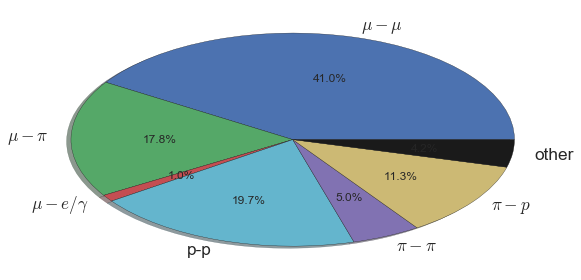

In [832]:
Background = samples[2] # reduced[2] # 
BackgroundMuonMuon = Background[Background.pdg_short*Background.pdg_long == 169]
print '%.1f'%(100.*float(len(BackgroundMuonMuon))/len(Background)),'% µ-µ'
BackgroundMuonPion = Background[np.abs(Background.pdg_short*Background.pdg_long) == 2743]
print '%.1f'%(100.*float(len(BackgroundMuonPion))/len(Background)),'% µ-π'
BackgroundProtonProton = Background[np.abs(Background.pdg_short*Background.pdg_long) == 4892944]
print '%.1f'%(100.*float(len(BackgroundProtonProton))/len(Background)),'% p-p'
BackgroundPionProton = Background[np.abs(Background.pdg_short*Background.pdg_long) == 466732]
print '%.1f'%(100.*float(len(BackgroundPionProton))/len(Background)),'% π-p'
BackgroundPionPion = Background[np.abs(Background.pdg_short*Background.pdg_long) == 44521]
print '%.1f'%(100.*float(len(BackgroundPionPion))/len(Background)),'% π-π'
BackgroundMuonEl = Background[(np.abs(Background.pdg_short*Background.pdg_long) == 143)|(np.abs(Background.pdg_short*Background.pdg_long) == 286)]
print '%.1f'%(100.*float(len(BackgroundMuonEl))/len(Background)),'% µ-e/photon'
lenOthers = len(Background) - (len(BackgroundMuonMuon) + len(BackgroundMuonPion) + len(BackgroundProtonProton) + len(BackgroundPionProton) + len(BackgroundPionPion) + len(BackgroundMuonEl))
FracOthers = 100.0 - 100.*float( len(BackgroundMuonMuon) + len(BackgroundMuonPion) + len(BackgroundProtonProton) + len(BackgroundPionProton) + len(BackgroundPionPion) + len(BackgroundMuonEl))/len(Background)
print 'non categorized %.1f'%FracOthers
# Background[['pdg']]
fig=plt.figure(figsize=figures_size)
explode = None#(0.1, 0.05, 0.13, 0.2,0.15,0.1,0.01)
patches, texts, autotexts = plt.pie([len(BackgroundMuonMuon),len(BackgroundMuonPion),len(BackgroundMuonEl),len(BackgroundProtonProton),len(BackgroundPionPion),len(BackgroundPionProton),lenOthers],
        labels=['$\mu-\mu$','$\mu-\pi$','$\mu-e/\gamma$','p-p','$\pi-\pi$','$\pi-p$','other'],
         explode=explode,autopct='%1.1f%%',shadow=True);
for t in texts:
    t.set_size('xx-large')
for t in autotexts:
    t.set_size('large')
fig.tight_layout()
fig.savefig(figures_path+'pieChartBackgroundNon1mu1p.pdf')

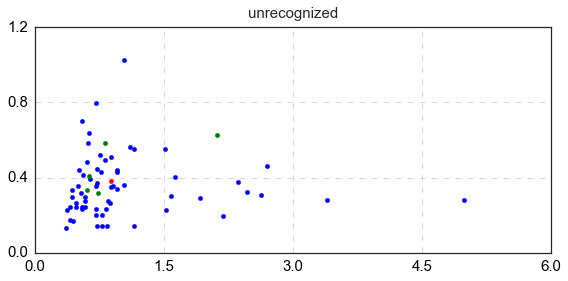

In [932]:
# fig=plt.figure(figsize=(16,9))
# plot_feature_2tracks_clusters(samples=reduced,i=1,var='endy_assigned_muon',x_label='$y_{end}$ assigned proton',bins=np.linspace(-120,120,121),fig=fig)
# plot_feature_2tracks_clusters(samples=reduced,i=2,var='endy_assigned_proton',x_label='$y_{end}$ assigned muon',bins=np.linspace(-120,120,121),fig=fig,do_add_legend=True)
# plot_feature_2tracks_clusters(samples=reduced,var='reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff',x_label='reco. $E_{\\nu}^{angles}$ - reco. $E_{\\nu}^{momenta}$',bins=np.linspace(-3,3,100),do_add_legend=True)
# plot_feature_2tracks_clusters(samples=reduced,var='2_tracks_angle',x_label='$\\theta_{track-1,track-2}$ [deg.]',mul=180./np.pi,bins=np.linspace(0,180,60),do_add_legend=True)
# plot_feature_2tracks_clusters(samples=reduced,var='PIDa_ratio_smaller_larger',x_label='small PIDa / large PIDa',bins=np.linspace(0,1.3,60),do_add_legend=True)
# plot_feature_2tracks_clusters(samples=reduced,var='delta_theta',x_label='$\\delta \\theta$ [deg.]',bins=np.linspace(0,220,60),do_add_legend=True)
# plot_feature_2tracks_clusters(samples=reduced,var='delta_phi',x_label='$\\delta \\phi$ [deg.]',bins=np.linspace(0,220,60),do_add_legend=True)
# plot_feature_2tracks_clusters(samples=reduced,var='distance',x_label='$d$ [cm]',bins=np.linspace(0,10,60),do_add_legend=True)
# plot_feature_2tracks_clusters(samples=reduced,var='l_small_pida',x_label='length of track with smaller PIDa [cm]',bins=np.linspace(0,400,100),do_add_legend=True)
# plot_feature_2tracks_clusters(samples=reduced,var='reco_CC1p_Pt',x_label='reconstructed $(p_{\\mu}+p_{p})_t$ [GeV/c]',bins=np.linspace(0,.4,40),do_add_legend=True)
# plot_feature_2tracks_clusters(samples=reduced,var='reco_CC1p_theta_pq',x_label='reconstructed $\\theta(p,q)$ [deg.]',bins=np.linspace(0,30,30),do_add_legend=True)
# plot_feature_2tracks_clusters(samples=reduced,var='reco_CC1p_p_over_q',x_label='$p/q$',bins=np.linspace(0,2,30),do_add_legend=True)
# plot_feature_2tracks_clusters(samples=reduced,var='reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff',x_label='$\\Delta Ev$ [GeV]',bins=np.linspace(-1,2,30),do_add_legend=True)
# plot_feature_2tracks_clusters(samples=reduced,var='ratio_associated_hit_charge_to_total_u',x_label='associated $\\Delta Q$ / $\\Delta Q$ u-plane',bins=np.linspace(-1,2,30),do_add_legend=True)
# plot_feature_2tracks_clusters(samples=reduced,var='ratio_associated_hit_charge_to_total_v',x_label='associated $\\Delta Q$ / $\\Delta Q$ v-plane',bins=np.linspace(-1,2,30),do_add_legend=True)
# plot_feature_2tracks_clusters(samples=reduced,var='ratio_associated_hit_charge_to_total_y',x_label='associated $\\Delta Q$ / $\\Delta Q$ y-plane',bins=np.linspace(-1,2,30),do_add_legend=True)
# plot_feature_2tracks_clusters(samples=reduced,var='reco_CC1p_W2',x_label='$W^2$ [GeV]',bins=np.linspace(-1,2,30),do_add_legend=True)
# plot_feature_2tracks_clusters(samples=reduced,var='reco_CC1p_Q2',x_label='$Q^2$ (GeV/c)$^2$',bins=np.linspace(-1,2,30),do_add_legend=True)
# plot_feature_2tracks_clusters(samples=reduced,var='delta_phi',x_label='$\\delta \phi$ [deg.]',bins=np.linspace(150,210,30),do_add_legend=True)
# plot_feature_2tracks_clusters(samples=reduced,var='reco_CC1p_omega',x_label='$\omega$ [GeV]',bins=np.linspace(-0.1,0.8,30),do_add_legend=True)

# plot_feature_2tracks_clusters_2d(samples=reduced,varx='reco_CC1p_theta_pq',vary='reco_CC1p_Pt',x_label='$\\theta(p,q)$ [deg.]',y_label='$p_t$ [GeV/c]',plottype='scatter',bins=50,do_add_legend=True,figsize=(10,10));
# plot_feature_2tracks_clusters_2d(samples=reduced,varx='reco_CC1p_theta_pq',vary='reco_CC1p_p_over_q',x_label='$\\theta(p,q)$ [deg.]',y_label='$p/q$',bins=(np.linspace(0,35,50),np.linspace(0,2,50)),do_add_legend=True,plottype='scatter',figsize=(10,10));
# plot_feature_2tracks_clusters_2d(samples=reduced,varx='reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff',vary='reco_CC1p_theta_pq',x_label='$\\Delta Ev$ [GeV]',y_label='$p_t$ [GeV/c]',plottype='scatter',bins=50,do_add_legend=True,figsize=(10,10));
# plot_feature_2tracks_clusters_2d(samples=reduced,varx='reco_CC1p_Q2',vary='reco_CC1p_W2',plottype='scatter',x_label='$Q^2$ (GeV/c)$^2$',y_label='$W^2$ [GeV/c$^2$]',bins=50,do_add_legend=True,figsize=(10,10));
# plot_feature_2tracks_clusters_2d(samples=reduced,varx='reco_CC1p_Q2',vary='reco_CC1p_Xb',x_label='$Q^2$ (GeV/c)$^2$',y_label='$x_B$',plottype='scatter',bins=(np.linspace(0,1,50),np.linspace(0,0.5,50)),do_add_legend=True,figsize=(10,10));
# plot_feature_2tracks_clusters_2d(samples=reduced,varx='ratio_associated_hit_charge_to_total_y',vary='ratio_associated_hit_charge_to_total_u',plottype='scatter',x_label='$Q^2$ (GeV/c)$^2$',y_label='$x_B$',bins=(np.linspace(0,1,50),np.linspace(0,1,50)),do_add_legend=True,figsize=(10,10));
# plot_feature_2tracks_clusters_2d(samples=reduced,varx='reco_CC1p_q_x',vary='reco_CC1p_q_y',x_label='',y_label='',plottype='scatter',bins=50,do_add_legend=True,figsize=(10,10));
# plot_feature_2tracks_clusters_2d(samples=reduced,varx='reco_CC1p_alpha_p',vary='reco_CC1p_alpha_mu',x_label='',y_label='',plottype='scatter',bins=(np.linspace(0,1,50),np.linspace(0,1,50)),do_add_legend=True,figsize=(10,10));
# plot_feature_2tracks_clusters_2d(samples=reduced,varx='reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff',vary='reco_CC1p_Ev_from_angles_Ev_from_mu_p_ratio',x_label='',y_label='',plottype='scatter',bins=(np.linspace(0,1,50),np.linspace(0,1,50)),do_add_legend=True,figsize=(10,10));
# plot_feature_2tracks_clusters_2d(samples=reduced,varx='reco_CC1p_omega',vary='reco_CC1p_q',x_label='',y_label='',plottype='scatter');
# plot_feature_2tracks_clusters_2d(samples=reduced,varx='reco_CC1p_omega',vary='reco_CC1p_W2',x_label='',y_label='',plottype='scatter');
plot_feature_2tracks_clusters_2d(samples=reduced,varx='reco_CC1p_Xb',vary='reco_CC1p_Q2',x_label='',y_label='',plottype='scatter');

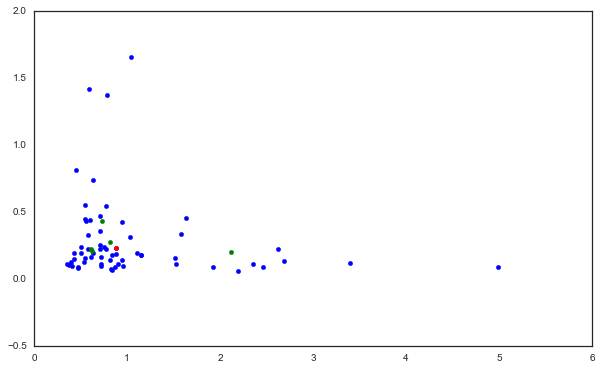

In [936]:
# fig = plt.figure(figsize=(10,6))
fig,ax=plt.subplots(figsize=(10,6))
for i,sample,color in zip(range(len(samples)),reduced,['blue','green','red','purple']):
#     plt.hist( sample.reco_CC1p_alpha_p - sample.reco_CC1p_alpha_q + sample.reco_CC1p_alpha_mu , bins=np.linspace(0,4,100),histtype='step',normed=1, linewidth=2)
#     ax = fig.add_subplot(2,2,i+1)
#     plot_2d_hist( sample.reco_CC1p_theta_pq, sample.reco_CC1p_p_over_q ,
#                  bins=(np.linspace(-0.6,8.2,100),np.linspace(-0.6,3.5,100)),ax=ax)
    ax.scatter( sample.reco_CC1p_Xb, sample.reco_CC1p_Ev*sample.reco_CC1p_Pmu , color=color)
                 

In [593]:
def max_eff_in_selected_cuts(x,do_print=False):
    
    [max_FV_y ,delta_Delta_phi ,
     max_theta_pq , delta_reco_CC1p_p_over_q,
     max_reco_CC1p_Pt , 
     delta_2_tracks_angle , delta_reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff ,
     delta_PIDa_ratio_smaller_larger,
     min_ratio_associated_hit_charge_to_total_u,
     min_ratio_associated_hit_charge_to_total_v,
     min_ratio_associated_hit_charge_to_total_y, 
     delta_reco_CC1p_W2] = x
                       
    frac,number = [],[]
    for i,sample,label in zip(range(len(samples)),samples,labels):
        r,f,ferr = sample_in_selected_cut( data=sample, label=label, do_print=False
                           ,max_FV_y = max_FV_y                                        
                           ,delta_Delta_phi = delta_Delta_phi
                           ,max_theta_pq = max_theta_pq
                           ,delta_reco_CC1p_p_over_q = delta_reco_CC1p_p_over_q
                           ,max_reco_CC1p_Pt = max_reco_CC1p_Pt
                           ,delta_2_tracks_angle = delta_2_tracks_angle
                           ,delta_reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff = delta_reco_CC1p_Ev_from_angles_Ev_from_mu_p_diff
                           ,delta_PIDa_ratio_smaller_larger = delta_PIDa_ratio_smaller_larger
                           ,min_ratio_associated_hit_charge_to_total_u = min_ratio_associated_hit_charge_to_total_u
                           ,min_ratio_associated_hit_charge_to_total_v = min_ratio_associated_hit_charge_to_total_v
                           ,min_ratio_associated_hit_charge_to_total_y = min_ratio_associated_hit_charge_to_total_y
                                          ,delta_reco_CC1p_W2=delta_reco_CC1p_W2
                                        )        
        frac.append(f)
        number.append(len(r))
    efficiency = frac[0]
    purity = 100.*float(number[0])/np.sum(number) if np.sum(number)>0 else np.sum(number)
    if (frac[0]>5 and purity>80):
        result = -purity*(np.power(efficiency,1))
    else:
        result = -purity*(np.power(efficiency,0.5))
    if (frac[0]>4 and purity>80) or purity>95 or do_print:
        print x
        print frac
        print 'purity: %.1f'%purity
        print 'efficiency: %.1f'%frac[0]
        print 'result: %.1f'%result
        print  
    return result

In [594]:
# y(max), 𝚫ɸ, 𝜃(p,q), p/q, Pt(max), angle-2-tracks, Ev_angles-Ev_momenta, small-PIDa/large-PIDa, 𝚫Q associated/𝚫Q total, W2
# init = np.array([100 , 30 , 20, 0.4 , 0.4 , 90 , 0.5 , 0.5, 0 , 0 , 0 , 1])
init = np.array([93.5, 33. , 50., 2.05, 0.6, 72.5, 1.3, 1.07, 0.95, 0.95, 0.93 , 1])
steps = 0.5*init#[15 , 13 , 25, 1 , 0.5 , 15 , 0.1 , 0.6, 0.1 , 0.1 , 0.1 ]  # 0.3*init #
print 'start\n',max_eff_in_selected_cuts(init,do_print=True);

s = Simplex(max_eff_in_selected_cuts, init , steps) 
v, err, iter = s.minimize(epsilon = 0.001, maxiters = 1000, monitor = 0)
del(s)

print 'finished after ', iter,'iterations'
print 
print 'end\n',max_eff_in_selected_cuts(v,do_print=True)

start
[ 93.5   33.    50.     2.05   0.6   72.5    1.3    1.07   0.95   0.95
   0.93   1.  ]
[3.8895152198421648, 0.18788163457022075, 0.05449591280653951, 0.0]
purity: 86.2
efficiency: 3.9
result: -170.1

-170.100990047
[  93.5    33.     50.      2.05    0.6   108.75    1.3     1.07    0.95
    0.95    0.93    1.  ]
[4.002254791431793, 0.18788163457022075, 0.10899182561307902, 0.0]
purity: 83.5
efficiency: 4.0
result: -167.1

finished after  999 iterations

end
[ 140.25   33.     50.      2.05    0.6    72.5     1.3     1.07    0.95
    0.95    0.93    1.  ]
[6.257046223224352, 0.7750117426021607, 0.07266121707538602, 0.0]
purity: 75.0
efficiency: 6.3
result: -187.6

-187.605663576


# backups / others

## 2D

In [563]:
MCBNBextBNB.columns

Index([u'2_tracks_angle', u'GENIECC1p', u'Is1mu1p', u'IsMuonReconstructed',
       u'IsProtonReconstructed', u'IsVertexContained',
       u'IsVertexReconstructed', u'Nprimaries', u'PIDA_large_pida',
       u'PIDA_long',
       ...
       u'truth_startx', u'truth_starty', u'truth_startz', u'truth_theta_pq',
       u'vertex_id', u'vertex_x', u'vertex_y', u'vertex_z',
       u'PIDa_ratio_smaller_larger',
       u'ratio_associated_hit_charge_to_total_average_uv'],
      dtype='object', length=154)

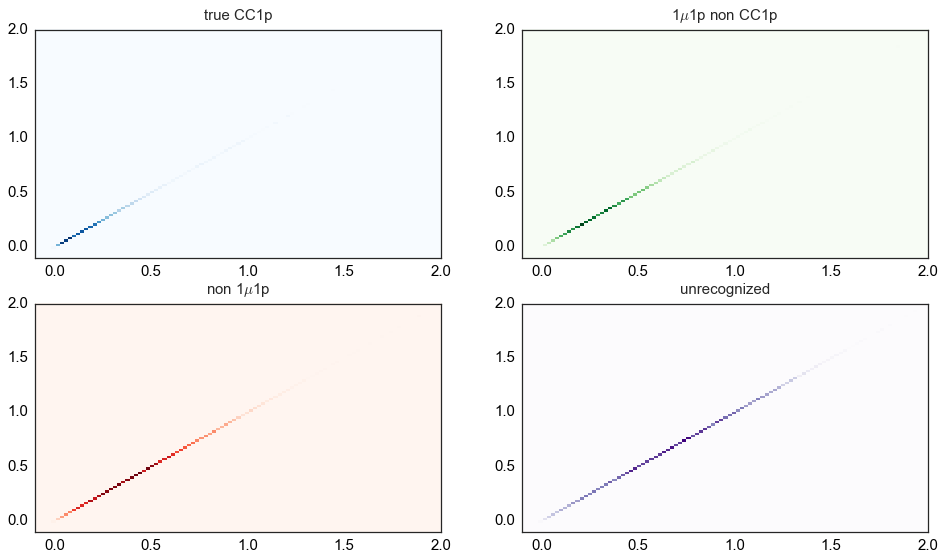

In [640]:
fig = plt.figure(figsize=(16,9))
bins=(np.linspace(-0.1,2.,100),np.linspace(-0.1,2.,100))#50#
varx='reco_CC1p_n_miss' #'reco_CC1p_W2'
vary='reco_CC1p_Pt'
for i,sample,label,cmap in zip(range(len(samples)),samples,labels,cmaps):
    ax = fig.add_subplot(2,2,i+1)
    ax.set_title(label,fontsize=figures_fontsize,y=1.02)
    plot_2d_hist(sample[varx],sample[vary],ax=ax,fontsize=figures_fontsize,bins=bins,cmap=cmap)

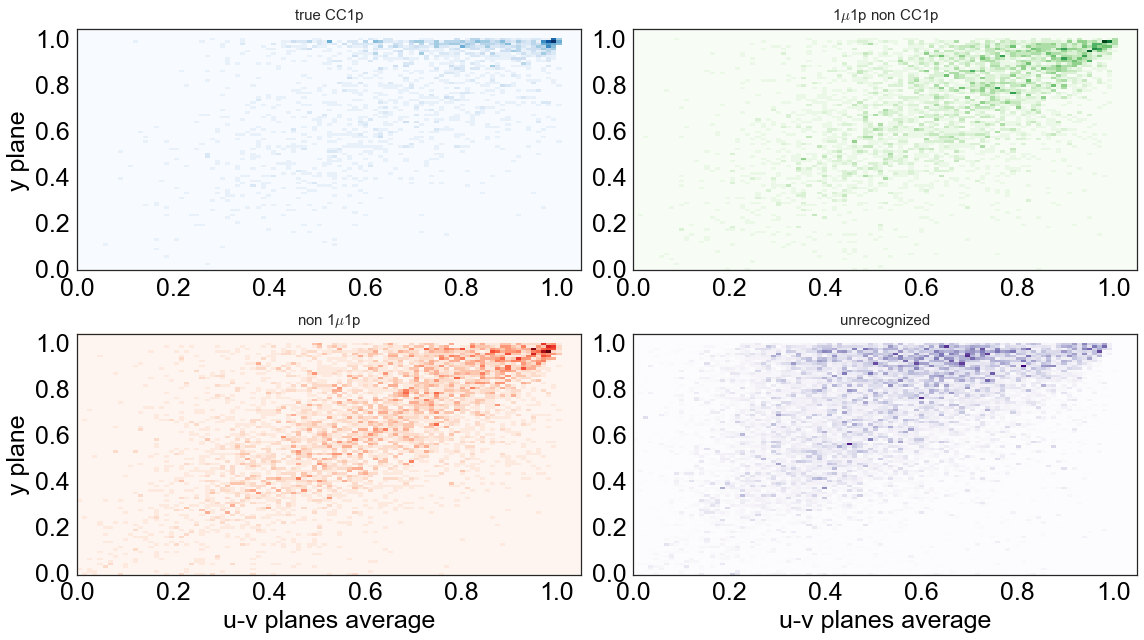

In [306]:
fig = plt.figure(figsize=(16,9))
bins=np.linspace(0,1.05,100)
x_label='u-v planes average'
y_label='y plane'
for i,sample,label,cmap in zip(range(len(samples)),samples,labels,cmaps):
    ax = fig.add_subplot(2,2,i+1)
    ax.set_title(label,fontsize=figures_fontsize,y=1.02)
    plot_2d_hist(sample.ratio_associated_hit_charge_to_total_average_uv,sample.ratio_associated_hit_charge_to_total_y,ax=ax,fontsize=figures_fontsize,bins=bins,cmap=cmap)
#     plot_2d_hist(sample.ratio_associated_hit_charge_to_total_u,sample.ratio_associated_hit_charge_to_total_y,ax=ax,fontsize=figures_fontsize,bins=bins,cmap=cmap)
#     plot_2d_hist(sample.ratio_associated_hit_charge_to_total_v,sample.ratio_associated_hit_charge_to_total_y,ax=ax,fontsize=figures_fontsize,bins=bins,cmap=cmap)
    set_axes(ax,x_label=x_label if i>1 else '' , y_label=y_label if i!=1 and i!=3 else '')
plt.tight_layout()
fig.savefig(figures_path+'associated_charge_ratio.pdf')

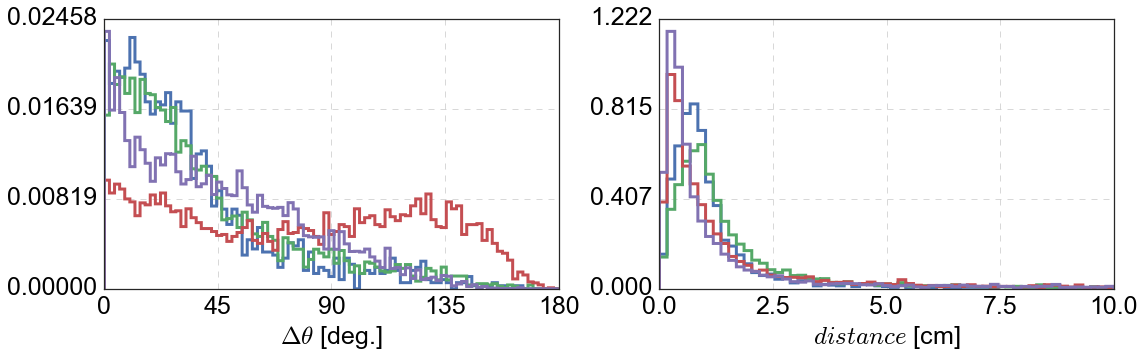

In [195]:
fig=plt.figure(figsize=(16,9))
plot_feature_2tracks_clusters(i=1,var='delta_theta',x_label='$\\Delta \\theta$ [deg.]',bins=np.linspace(0,180,90),fig=fig)
plot_feature_2tracks_clusters(i=2,var='distance',x_label='$distance$ [cm]',bins=np.linspace(0,10,60),fig=fig)
# plot_feature_2tracks_clusters(i=3,var='cfdistance_small_pida',x_label='closest flash distance small-pid-A',bins=np.linspace(-100,100,100),fig=fig)
# plot_feature_2tracks_clusters(i=4,var='cfdistance_large_pida',x_label='closest flash distance large-pid-A',bins=np.linspace(-100,100,100),fig=fig)
plt.tight_layout()

